In [2]:
import pandas as pd # pandas is used to load and manipulate data and for one hot encoding
import numpy as np # data manipulation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors 
from sklearn.utils import resample # downsample the dataset
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make support vector machines for classification
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this will create confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

In [3]:
df = pd.read_csv('Overview.csv')

In [4]:
df.head()

,DeviceTimeStamp,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,2019-06-25T13:06,0,0,0,37,0,0,0
1,2019-06-25T13:09,0,0,0,37,0,0,0
2,2019-06-27T10:49,0,0,0,38,0,0,0
3,2019-06-27T10:51,0,0,0,38,0,0,0
4,2019-06-27T10:52,0,0,0,39,0,0,0


In [5]:
df.drop('DeviceTimeStamp', axis=1, inplace = True) ## set axis = 0 to remove rows, axis = 1 to remove colums
df.head()

,OTI,WTI,ATI,OLI,OTI_A,OTI_T,MOG_A
0,0,0,0,37,0,0,0
1,0,0,0,37,0,0,0
2,0,0,0,38,0,0,0
3,0,0,0,38,0,0,0
4,0,0,0,39,0,0,0


# missing data

In [6]:
df.dtypes

OTI      int64
WTI      int64
ATI      int64
OLI      int64
OTI_A    int64
OTI_T    int64
MOG_A    int64
dtype: object

In [7]:
df['OTI'].unique()

array([  0,  34,  35,  13,  12,  11,   9,  33,  32,  30,  31,  29,  28,
        27,  42,  43,  41,  39,  38,  37,  40,  26,  25,  22,  23,  24,
        21,  20,  36,  44,  45,  47, 245, 246,  49,  48,  46,  50,  51,
        52,  54, 238, 239, 243, 244, 242, 241, 247, 250, 249, 248,  53,
       236,  19,  18,  16,  17,  15,  14], dtype=int64)

In [8]:
df['WTI'].unique()

array([0, 1], dtype=int64)

In [9]:
df['ATI'].unique()

array([ 0, 34, 35, 33, 32, 29, 30, 28, 31, 26, 25, 24, 27, 23, 36, 37, 38,
       40, 41, 42, 39, 43, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 44],
      dtype=int64)

In [10]:
df['OLI'].unique()

array([ 37,  38,  39,  36,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  58,  57,  56,  53,  55,  54,  51,  52,  59,  60,  61,
        62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  80,
        79,  83,  82,  81,  84,  85,  86,  74,  75,  77,  78,  76,  87,
        88,  89,  91,  94,  90,  92,  93,  95,  96,  97,  98,  99, 100],
      dtype=int64)

In [11]:
len(df)

20316

In [12]:
df_no_missing = df

In [13]:
len(df_no_missing)

20316

In [14]:
df_no_fault = df_no_missing[df_no_missing['OTI_T'] == 0]
df_fault = df_no_missing[df_no_missing['OTI_T'] == 1]

In [15]:
df_no_fault_downsampled = resample(df_no_fault,
                                    replace = False,
                                    n_samples=1000,
                                    random_state=42)
len(df_no_fault_downsampled)

1000

In [16]:
len(df.loc[(df['OTI_T'] == 1)])

47

In [17]:
df_fault_downsampled = resample(df_fault,
                                    replace = False,
                                    n_samples=47,
                                    random_state=42)
len(df_fault_downsampled)

47

In [18]:
df_downsample = pd.concat([df_no_fault_downsampled, df_fault_downsampled])
len(df_downsample)

1047

In [19]:
X = df_downsample.drop('OTI_T', axis=1).copy() # alternatively: X = df_no_missing.iloc[:,:-1].copy
X.head()

,OTI,WTI,ATI,OLI,OTI_A,MOG_A
15921,25,1,22,100,0,0
11994,32,0,36,76,0,0
18293,40,1,35,100,0,0
5058,34,0,27,41,0,0
11863,23,0,22,96,0,0


In [20]:
y = df_downsample['OTI_T'].copy()
y.head()

15921    0
11994    0
18293    0
5058     0
11863    0
Name: OTI_T, dtype: int64

# centering and scalling

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

# building a preliminary support vector machine

In [35]:
clf_svm = SVC(random_state=42)
clf_svm.fit(X_train_scaled, y_train)
y_pred = clf_svm.predict(X_test_scaled)

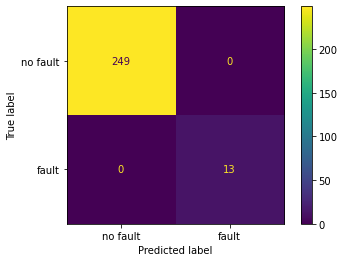

In [36]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=["no fault", "fault"])

# precision 

In [38]:
from sklearn.metrics import precision_score
print("precision score for SVM rbf kernel:", 100*precision_score(y_test, y_pred))

precision score for SVM rbf kernel: 100.0


# Recall

In [39]:
from sklearn.metrics import recall_score
print('Recall for SVM rbf kernels:', 100 * recall_score(y_test, y_pred))

Recall for SVM rbf kernels: 100.0


# F1-score

In [40]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_test, y_pred))

F1 score: 1.0


# building, evaluating, drawing, interpreting the final svm

In [41]:
clf_svm = SVC(random_state=42, C = 1, gamma = 0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1, gamma=0.001, random_state=42)

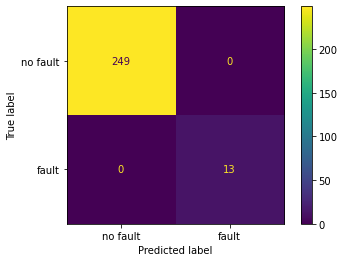

In [42]:
plot_confusion_matrix(clf_svm,
                     X_test_scaled,
                     y_test,
                     values_format='d',
                     display_labels=["no fault", "fault"])

In [43]:
len(df_downsample.columns)

7

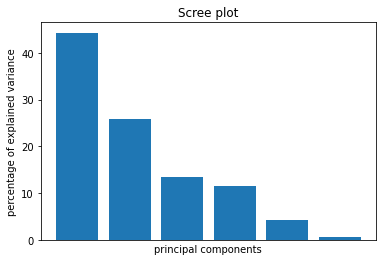

In [44]:
pca = PCA() # by default pca centers the data by does not scale it
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = [str(x) for x in range(1, len(per_var)+1)]

plt.bar(x = range(1, len(per_var)+1), height= per_var)
plt.tick_params(
axis='x',            # change apply to x axis 
which='both',        # both major and minor ticks are affected
bottom = False,      # ticks along the bottom edges are off
top = False,         # ticks along the top edges are off
labelbottom = False) # labels along the bottom edges are off
plt.ylabel('percentage of explained variance')
plt.xlabel('principal components')
plt.title('Scree plot')
plt.show()